<a href="https://colab.research.google.com/github/liamedeiros/Newton2BlackHoles/blob/main/solutions/Projectile_Motion_and_orbits_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projectile Motion and Orbits Solutions

This notebook primarily follows the Day 2 curriculum of ["From Newton to Black Holes"](https://www.dropbox.com/s/kbfx7bq4eukopuz/Lesson%20Plan_From%20Newton%20to%20Black%20Holes.pdf?dl=0), which was developed as part of the NSF funded project [Black Hole PIRE](https://bhpire.arizona.edu/).

Learning objectives for this notebook:
* Explore the motion of projectiles on the surface of the Earth
* Understand orbits as the continuous free fall of a projectile around the Earth

before we begin, please compile the cell below to load in the necessary libraries.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import matplotlib
# from matplotlib import rcParams
from matplotlib import rc
%matplotlib inline
!apt-get update
!apt install cm-super
!sudo apt install cm-super dvipng texlive-latex-extra texlive-latex-recommended
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['font.family'] = 'serif'

In this notebook you will explore the motion of projectiles on the Earth's surface and understand them in terms of Newton's theory of gravity.

For your first exploration, you will use the following web-based app developed at the University of Colorado: [https://phet.colorado.edu/en/simulation/projectile-motion](https://phet.colorado.edu/en/simulation/projectile-motion).


The figure below shows a screenshot from the app, and points out a few of its controls. With this app, you can launch a projectile from a cannon and watch it as it free falls towards the surface of the Earth, following a parabolic trajectory.

![projectile motion](https://github.com/liamedeiros/Newton2BlackHoles/blob/main/projectile_motion.png?raw=1)

You can:
* Change the initial height of the cannon
* Change the angle of the cannon
* Change the initial speed of the projectile
* Change the type of projectile you are using
* Move the bullseye to measure the distance the projectile traveled.



1. **Set the cannon at 30 degrees, the initial height of the cannon to 0m, the initial speed at 10 m/s, and turn off air resistance. Change the mass and the type of the projectile (try throwing a piano!). Do these changes affect the trajectory of the objects?**

Fill in the answer in the text cell below.


2. **Set the cannon to 30 degrees, the initial height to 0 m, and turn off air resistance. Change the initial velocity from 5 m/s to 30 m/s in intervals of 5m/s. Move the location of the bullseye to match where your object landed to get an accurate measurement of horizontal distance. Define an array named ```initial_velocity_array``` and populate it with the values of initial velocity you are testing (5, 10, 15, 20, 25, 30). Define another array named ```horizontal_distance_array``` and populate it with the results from your experiement in the web app.**

Use the cell below to plot the results of exercise 2. Plot the initial velocity on the x-axis and the horizontal distance on the y-axis. Remember to add a grid and label your axes.

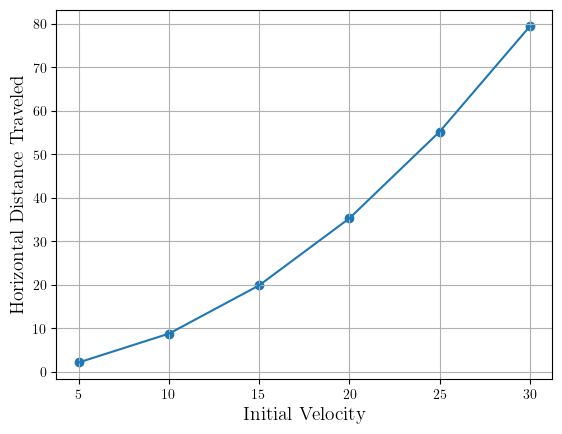

In [3]:
# Solution!

initial_velocity_array = np.array([5, 10, 15, 20, 25, 30])
horizontal_distance_array = np.array([2.18, 8.8, 19.9, 35.3, 55.2, 79.4])

plt.plot(initial_velocity_array, horizontal_distance_array)
plt.scatter(initial_velocity_array, horizontal_distance_array)

plt.xlabel('Initial Velocity', size=14) # this command adds a label to the x-axis, and this label is "x"
plt.ylabel('Horizontal Distance Traveled', size=14) # this command adds a label to the y-axis, and this label is "y"
plt.grid() # this command adds a grid to the graph



3. **Based on your plot of the experiment above what did you learn? How is initial velocity related to horizontal distance traveled?**

Fill in your answer in the text cell below.



For our second exploration, we will use the following web-based app developed at Weber State University:
[https://physics.weber.edu/schroeder/software/NewtonsCannon.html](https://physics.weber.edu/schroeder/software/NewtonsCannon.html)

The figure below shows a screenshot from the app, and points out a few of its controls. The drawing is actually a reproduction of the figure used by Newton himself to explain why an orbit is a continuous free fall.
With this app, you can launch a projectile in the horizontal direction from the top of a mountain and follow its trajectory.

![Newtons Cannon](https://github.com/liamedeiros/Newton2BlackHoles/blob/main/Newtons_cannon.png?raw=1)

You can:
* Change the initial speed of the projectile
* Add sound effects!

We can now use this app to extend the understanding we gained in questions 1-3 and ask what would happen if we fired the cannon with such a high velocity that the range becomes comparable to the radius of the Earth. The fact that the Earth is not flat is important here.



4. **Increase the initial speed of the projectile. How high should the initial velocity be in order to send the projectile into an orbit? (By orbit we mean that the projectile goes around the Earth and returns to its starting point.)**

Fill in your answer in the text cell below.


We will now go back to the projectile motion exercise (number 2 above). Notice that as initial velocity increases the amount by which the distance traveled increases, also increases. In other words, this plot is not a straight line, but curves up. This might even remind you a bit of a parabola.

5. **To test this, plot the initial velocity squared as a function of the distance traveled below.**

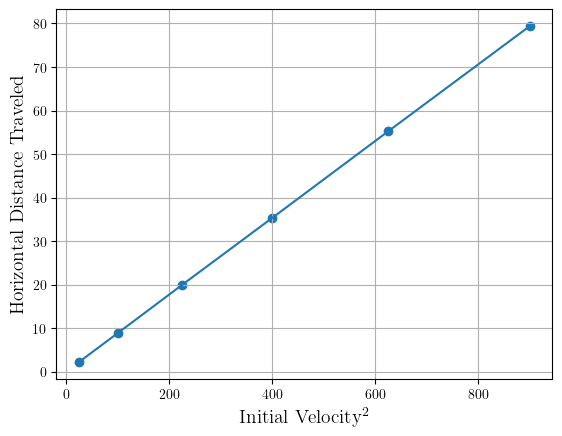

In [4]:
# Solution!

initial_velocity_array = np.array([5, 10, 15, 20, 25, 30])
horizontal_distance_array = np.array([2.18, 8.8, 19.9, 35.3, 55.2, 79.4])

plt.plot(initial_velocity_array**2, horizontal_distance_array)
plt.scatter(initial_velocity_array**2, horizontal_distance_array)

plt.xlabel('Initial Velocity$^2$', size=14) # this command adds a label to the x-axis
plt.ylabel('Horizontal Distance Traveled', size=14) # this command adds a label to the y-axis
plt.grid() # this command adds a grid to the graph

6.  **Is this plot a straight line? If so, what this really means is that these points follow the equation $y=mx+b$ where $x=\mathrm{initial\,velocity}^2$, $m$ is the slope the line in the plot above, and $b$ is the y-intercept, which is close to zero. Use ```scipy.stats.linregress``` to fit for the slope and the y-intercept of the line. Print the best fit values for the slope and the y-intercept.**

In [5]:
# Solution!

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(initial_velocity_array**2, horizontal_distance_array)
print(slope, intercept)

0.08826299124604212 -0.0030508474576365074


In the next few cells we will solve for the slope theoretically, using the projectile motion equations, and then compare to the result we got above.

The equations of projectile motion are:

$x=v_0t\cos{(\theta)}$

$y=v_0t\sin{(\theta)}-\frac{1}{2}gt^2$

The variables are defined below:
* $x$ is the horizontal location of the projectile
* $v_0$ is the initial velocity of the projectile
* $t$ is the time since the projectile left it's starting point
* $\theta$ is the angle the projectile was thrown at, the angle of the cannon in the web app
* $y$ is the vertical location of the projectile
* g is the gravitational acceleration ($9.8\mathrm{m/s^2}$)

Note that the variables $x$, $y$, and $t$ are defined at each instant in time, such that at each point in the projectile's trajectory its location will satisfy both of these equations. Note that these equations ignore the effects of air resistance, and set the initial height of the projectile to $y=0$.  


Below I've defined a function that takes in values for the initial velocity and the angle of the cannon, and plots the trajectory of the object on a plot. The name of the function is ```projectile_motion``` and one can use that name to call the function. When calling the function, one needs to always provide the initial velocity (```v0```), followed by the angle $\theta$ (```theta```), within ```()```. **Execute this cell so that the computer knows that this function has been defined.**

In [6]:
def projectile_motion(v0, theta):
  t = np.arange(400)/100 # this generates an array of values for t that range from 0 to almost 4
  theta = theta/360*2.*np.pi # we assume that the user will give theta in units of degrees,
  # but the functions below need it to be in radians. This converts it.
  g=9.8 # gravitational accelaration in m/s^2

  # the two lines below are the projectile motion equations
  x=v0*t*np.cos(theta)
  y=v0*t*np.sin(theta) - 0.5*g*t*t

  # we only care about where y >=0
  # the lines of code below remove the parts where y<0.
  where_we_want = np.where(y>=0) # where function finds the places in the array where this condition is met
  x_new = x[where_we_want] # x_new is a new array that will only contain values where y<0
  y_new = y[where_we_want] # y_new is a new array that will only contain values where y<0


  plt.plot(x_new, y_new)
  plt.axhline(y=0, c='k') # this line plots a horizontal line at y=0
  plt.xlabel('Horizontal Distance', fontsize=14)
  plt.ylabel('Height', fontsize=14)
  plt.grid(True) # we need a True here because if you call it multiple times it'll toggle on and off
  return

We can use this function to re-do the experiment you did on the web app. To accomplish this we will use a very important programming tool, the ```for``` loop.

In the cell below you will see an example of a ```for``` loop that will simply print the numbers 5, 10, 15, 20, 25, 30 (the values for the initial velocity you used with the web app). The ```for``` loop is a simple way for you to make the computer do something several times, without having to give the commands multiple times. ```for``` loops are incredibly useful for coding and one of the most important coding concepts.

In [7]:
for v0 in [5, 10, 15, 20, 25, 30]: # this command starts the for loop.
  # The for loop will loop through the values in the square brackets above
  print(v0) # here we will print the value of i so that you can see it change

5
10
15
20
25
30


7. **To re-create the experiment you performed on the web app, we will first set theta=30 degrees (add a line below that sets theta to 30). We will then loop over the values of ```v0``` as we did above, and for each loop we will execute the ```projectile_motion``` function with the new value of ```v0```.**

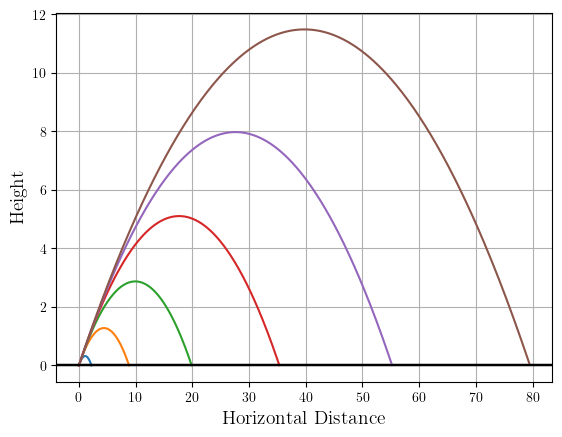

In [8]:
# Solution!
theta = 30

for v0 in [5, 10, 15, 20, 25, 30]:
  projectile_motion(v0, theta)

8. **Use some algebra to solve the first equation of projectile motion, $x=v_0t\cos{(\theta)}$ for $t$. You might want to do this on a piece of paper. You can type the solution into the code cell below, or in a text cell if you prefer. If you use a code cell, don't execute it.**

**Solution**

$t = \frac{x}{v_0\cos{(\theta)}}$




In [9]:
# Solution!

# t = x/(v0*np.cos(theta))

9. **Now plug your solution for $t$ into the equation for $y$, $y=v_0t\sin{(\theta)}-\frac{1}{2}gt^2$. Write your solution in either a text cell or a code cell.**

**Solution**

$y = v_0\left( \frac{x}{v_0\cos{(\theta)}}\right)\sin{(\theta)} - \frac{1}{2}g\left( \frac{x}{v_0\cos{(\theta)}}\right)^2$

$y = x\tan{(\theta)} - \frac{gx^2}{2(v_0 \cos{(\theta)})^2}$

We can re-write the equation you found above in the form

$y = ax^2 + bx +c$

as follows:

$y = \left( - \frac{g}{2(v_0 \cos{(\theta)})^2}\right) x^2 + \tan{(\theta)} x$

where $a=\left( - \frac{g}{2(v_0 \cos{(\theta)})^2}\right)$, $b = \tan{(\theta)} $ and $c=0$.

To find the distance that the projectile traveled before hitting the ground we need to solve this equation for the value of $x$ where $y=0$. We can solve this with the quadratic equation:

$ x = \frac{-b \pm \sqrt{b^2-4ac}}{2a}$

10. **In the code cell below, define a function that will take in the values of ```v0``` and ```theta``` and return the distance that the object traveled, the solution to the quadratic equation above that is not zero. Look back at the ```projectile_motion``` function defined above for hints. Plug in $c=0$ and simplify the quadratic equation on a piece of paper before writing your function.**

In [10]:
# Solution!

def distance_traveled(v0, theta):
  theta = theta/360*2.*np.pi # we assume that the user will give theta in units of degrees,
  # but the functions below need it to be in radians. This converts it.
  g=9.8 # gravitational accelaration in m/s^2

  a = -g/(2*(v0*np.cos(theta))**2)
  b = np.tan(theta)
  return -b/a

11. **Now check that your function works by copying the solution to question 7 below, and adding to each loop a call to this function. The function should return the value of x, when the y value is zero, so you can plot a point with plt.scatter for the location where the projectile will hit the floor.**

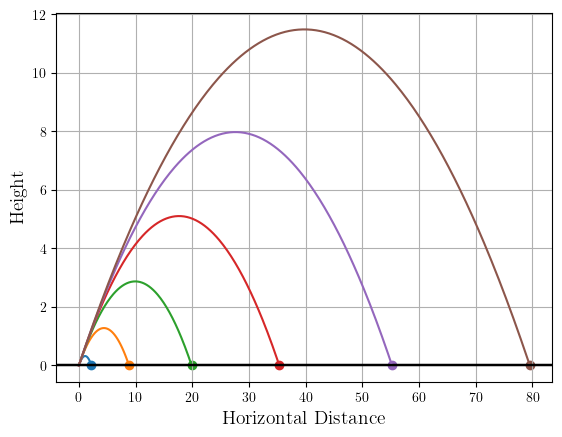

In [11]:
# Solution!
theta = 30

for v0 in [5, 10, 15, 20, 25, 30]:
  projectile_motion(v0, theta)
  x = distance_traveled(v0, theta)
  plt.scatter(x, 0)

12. **Now copy the solution to exercise 2, and on top of that curve, plot the x values that you find from the function you defined above, as a function of the initial velocity. Hint, you can probably plug a whole array of initial velocities into your function.**

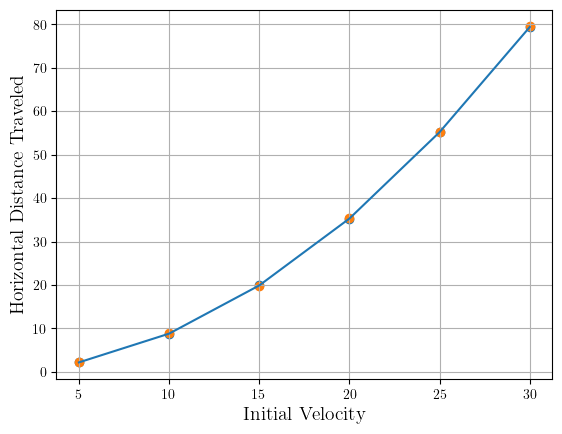

In [12]:
# Solution!

initial_velocity_array = np.array([5, 10, 15, 20, 25, 30])
horizontal_distance_array = np.array([2.18, 8.8, 19.9, 35.3, 55.2, 79.4])

plt.plot(initial_velocity_array, horizontal_distance_array)
plt.scatter(initial_velocity_array, horizontal_distance_array)

plt.xlabel('Initial Velocity', size=14) # this command adds a label to the x-axis, and this label is "x"
plt.ylabel('Horizontal Distance Traveled', size=14) # this command adds a label to the y-axis, and this label is "y"
plt.grid() # this command adds a grid to the graph

x = distance_traveled(initial_velocity_array, 30)
plt.scatter(initial_velocity_array, x)

13. **The exercises you just went through demonstrate several important aspects of being a scientist. First, you conducted an experiment, plotted the results of that experiment and analyzed the results. You then worked with the theoretical predictions of the experiment and compared the theory to the experimental results. Did your experiment match the theoretical predictions? As a final step, solve the quadratic equation by hand and find an equation for this line (in the form $\mathrm{horizontal\,distance\,travelled} = m  v_0^2$, where $m$ is the slope of the line you found in exercise 6). Does the slope you found theoretically match the results of exercise 6?**

**Solution**

The quadratic equation simplifies to

$x=\frac{-b}{a}$

which gives

$\mathrm{horizontal\,distance\,travelled} = \left( \frac{2\tan{\theta}\cos^2\theta}{g}\right)  v_0^2$

or

$\mathrm{horizontal\,distance\,travelled} = \left( \frac{2\sin{\theta}\cos\theta}{g}\right)  v_0^2$

When $\theta=30$ degrees this gives

In [14]:
theta=30
theta = theta/360*2*np.pi
g=9.8

slope_theory = 2*np.sin(theta)*np.cos(theta)/g
print(slope_theory)

0.0883699391616774
